### Daten laden

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("automobile.csv")
print("Anzahl Zeilen und Spalten:", df.shape)
df.head()

Anzahl Zeilen und Spalten: (58, 9)


,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


### Einzelne Spalten untersuchen

In [3]:
df["price"].describe()

count       58.000000
mean     15387.000000
std      11320.259841
min       5151.000000
25%       6808.500000
50%      11095.000000
75%      18120.500000
max      45400.000000
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

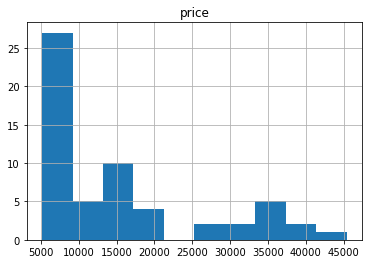

In [4]:
df.hist("price")

In [5]:
df["horsepower"].describe()

count     58.000000
mean     106.051724
std       48.915402
min       48.000000
25%       68.000000
50%      100.000000
75%      122.500000
max      262.000000
Name: horsepower, dtype: float64

array([[<AxesSubplot:title={'center':'horsepower'}>]], dtype=object)

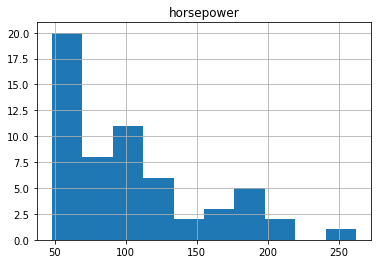

In [6]:
df.hist("horsepower")

### Korrelationen untersuchen

In [7]:
df['price'].corr(df['horsepower'])

0.9017065998910121

<AxesSubplot:xlabel='price', ylabel='horsepower'>

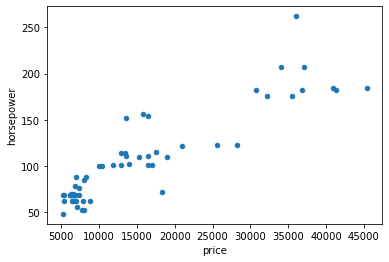

In [8]:
df.plot.scatter(x="price", y="horsepower")

### Regressiongerade bestimmen

In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df[["price"]], df["horsepower"])
print(f"Regressionsgerade: y = {reg.intercept_} + {reg.coef_[0]}*x")

Regressionsgerade: y = 46.09906704553443 + 0.0038963187815946316*x


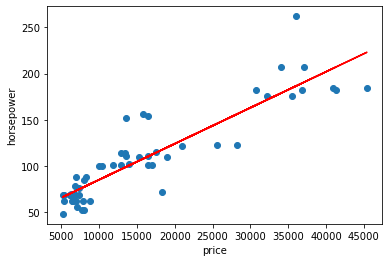

In [10]:
import matplotlib.pyplot as plt

predictions = reg.predict(df[["price"]])
plt.scatter(df["price"], df["horsepower"])
plt.plot(df["price"], predictions, 'r')
plt.xlabel("price")
plt.ylabel("horsepower")
plt.show()

### Korrelationen aller Spalten bestimmen

In [13]:
corr_df = df.corr()
corr_df

,wheel-base,length,horsepower,average-mileage,price
wheel-base,1.000000,0.881866,0.509146,-0.547084,0.663085
length,0.881866,1.000000,0.727067,-0.780370,0.788465
horsepower,0.509146,0.727067,1.000000,-0.842615,0.901707
average-mileage,-0.547084,-0.780370,-0.842615,1.000000,-0.770217
price,0.663085,0.788465,0.901707,-0.770217,1.000000


Darstellung als Heatmap:

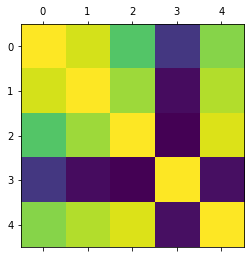

In [12]:
plt.matshow(corr_df)